<center><h1>Chen_Pohao_HW8</h1></center>

Name: Po Hao Chen
<br>
Github Username: pohaoc29
<br>
USC ID: 4213309111
<br>
Sorry, these two weeks I got an infection and caused to serious high fever(104.5F) for many days, so I am not able to finish my homework.

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [1]:
import os,sys
import numpy as np
import math
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [2]:
df = pd.read_csv('../data/breast+cancer+wisconsin+diagnostic/wdbc.data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
features = ['Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'Concave_Points', 'Symmetry','Fractal_Dimension']
columns_name = ['ID','Class']
for i in range(3):
    for j in range(len(features)):
        columns_name.append(features[j]+str(i+1))

columns_name

['ID',
 'Class',
 'Radius1',
 'Texture1',
 'Perimeter1',
 'Area1',
 'Smoothness1',
 'Compactness1',
 'Concavity1',
 'Concave_Points1',
 'Symmetry1',
 'Fractal_Dimension1',
 'Radius2',
 'Texture2',
 'Perimeter2',
 'Area2',
 'Smoothness2',
 'Compactness2',
 'Concavity2',
 'Concave_Points2',
 'Symmetry2',
 'Fractal_Dimension2',
 'Radius3',
 'Texture3',
 'Perimeter3',
 'Area3',
 'Smoothness3',
 'Compactness3',
 'Concavity3',
 'Concave_Points3',
 'Symmetry3',
 'Fractal_Dimension3']

In [4]:
df.columns = columns_name
df

,ID,Class,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,Concave_Points1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,Concave_Points3,Symmetry3,Fractal_Dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
df.loc[df.Class == 'B', 'Class'] = 0
df.loc[df.Class == 'M', 'Class'] = 1
df.Class = df.Class.astype(int)

### (b) Monte-Carlo Simulation

#### (i) Supervised Learning

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

train_acc_list = list()
train_prec_list = list()
train_recall_list = list()
train_F1_list = list()
train_AUC_list = list()

test_acc_list = list()
test_prec_list = list()
test_recall_list = list()
test_F1_list = list()
test_AUC_list = list()

X = df.drop(['ID','Class'], axis=1)
y = df.Class

#normalize scaler
scaler = MinMaxScaler()
normalized_X = pd.DataFrame(scaler.fit_transform(X))

X_pos = normalized_X[y == 0]
X_neg = normalized_X[y == 1]
y_pos = y[y == 0]
y_neg = y[y == 1]


#Monte-Carlo
for m in range(30):
    if(m == 0):
        print(f"The {(m+1)}st run of Monte-Carlo Simulation:")
    elif(m == 1):
        print(f"The {(m+1)}nd run of Monte-Carlo Simulation:")
    elif(m == 2):
        print(f"The {(m+1)}rd run of Monte-Carlo Simulation:")
    else:
        print(f"The {(m+1)}th run of Monte-Carlo Simulation:")
    # Split each class into training and test sets
    X_pos_train, X_pos_test, y_pos_train, y_pos_test = train_test_split(X_pos, y_pos, test_size=0.2, random_state=42)
    X_neg_train, X_neg_test, y_neg_train, y_neg_test = train_test_split(X_neg, y_neg, test_size=0.2, random_state=42)
    
    X_train = pd.concat([X_pos_train,X_neg_train])
    X_test = pd.concat([X_pos_test,X_neg_test])
    y_train = pd.concat([y_pos_train,y_neg_train])
    y_test = pd.concat([y_pos_test,y_neg_test])
    
    #L1-penalized SVM
    L1_SVMmodel = LinearSVC(penalty="l1", dual=False, max_iter=20000)
    
    # C: weight of the SVM penalty(lambda)
    C = np.logspace(-6,6,10)
    param_grid = {'C':C}

    grid_search = GridSearchCV(estimator=L1_SVMmodel, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Evaluate model performance
    best_C = grid_search.best_params_['C']
    print("Best C:", best_C)
    #best_model = grid_search.best_estimator_
    #print("Best score:", grid_search.best_score_)

    # Train final model
    best_L1_SVMmodel = LinearSVC(penalty="l1", dual=False, max_iter=20000, C=best_C)
    best_L1_SVMmodel.fit(X_train, y_train)
    
    # train prediction
    y_train_pred = best_L1_SVMmodel.predict(X_train)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1_score = f1_score(y_train, y_train_pred)
    fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
    train_auc = auc(fpr,tpr)
    
    train_acc_list.append(train_acc)
    train_prec_list.append(train_precision)
    train_recall_list.append(train_recall)
    train_F1_list.append(train_f1_score)
    train_AUC_list.append(train_auc)
    
    
    # test prediction
    y_pred = best_L1_SVMmodel.predict(X_test)
    
    test_acc = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    test_f1_score = f1_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    test_auc = auc(fpr,tpr)
    
    test_acc_list.append(test_acc)
    test_prec_list.append(test_precision)
    test_recall_list.append(test_recall)
    test_F1_list.append(test_f1_score)
    test_AUC_list.append(test_auc)
    
print()
print('Train sets:')
print('The average accuracy:', np.average(train_acc_list))
print('The average precision:', np.average(train_prec_list))
print('The average recall:', np.average(train_recall_list))
print('The average F1_score:', np.average(train_F1_list))
print('The average AUC:', np.average(train_AUC_list))

print()
print('Test sets:')
print('The average accuracy:', np.average(test_acc_list))
print('The average precision:', np.average(test_prec_list))
print('The average recall:', np.average(test_recall_list))
print('The average F1_score:', np.average(test_F1_list))
print('The average AUC:', np.average(test_AUC_list))

The 1st run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 2nd run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 3rd run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 4th run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 5th run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 6th run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 7th run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 8th run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 9th run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 10th run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 11th run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 12th run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 13th run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 14th run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 15th run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 16th run of Mon

#### ROC of training set

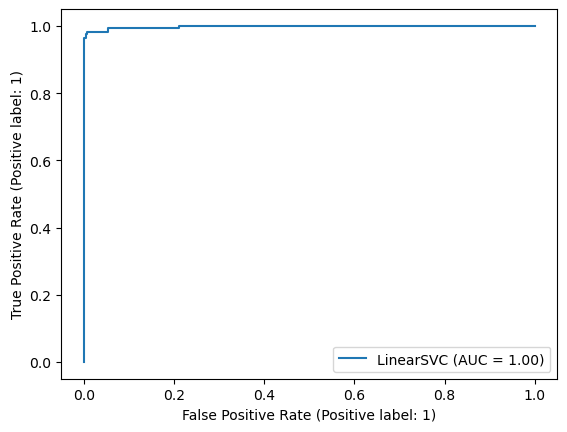

In [7]:
from sklearn import metrics
from sklearn.metrics import auc,roc_curve,roc_auc_score, RocCurveDisplay

SVM_disp = RocCurveDisplay.from_estimator(best_L1_SVMmodel, X_train, y_train)
plt.show()

#### Confusion matrix of training set

Training Confusion Matrix:
 [[283   2]
 [  3 166]]


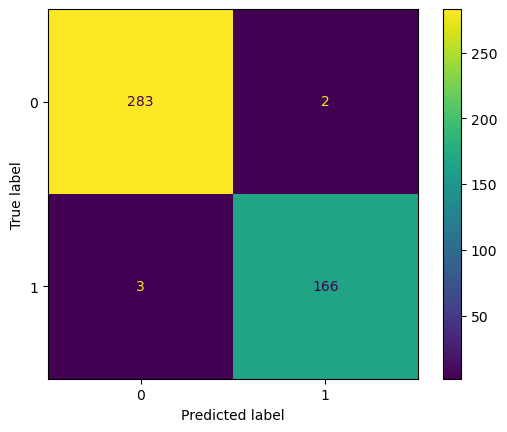

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_train_pred = best_L1_SVMmodel.predict(X_train)
train_cm = confusion_matrix(y_train, y_train_pred)
print("Training Confusion Matrix:\n", train_cm)

train_disp = ConfusionMatrixDisplay(confusion_matrix=train_cm)
train_disp.plot()
plt.show()

#### ROC of test set

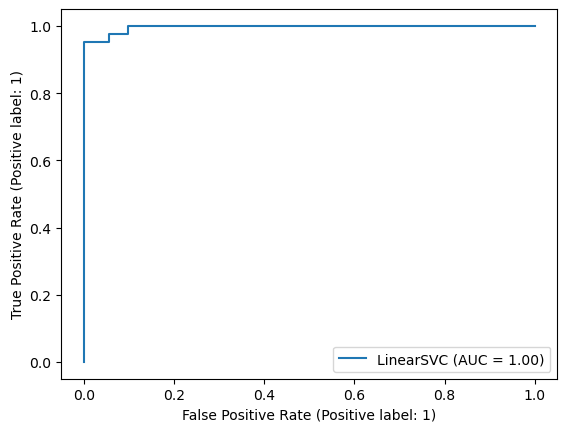

In [9]:
SVM_disp = RocCurveDisplay.from_estimator(best_L1_SVMmodel, X_test, y_test)
plt.show()

#### Confusion matrix of test set

Test Confusion Matrix:
 [[69  3]
 [ 2 41]]


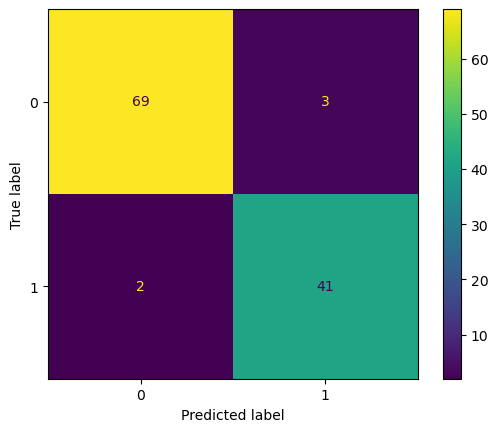

In [10]:
y_test_pred = best_L1_SVMmodel.predict(X_test)
test_cm = confusion_matrix(y_test, y_test_pred)
print("Test Confusion Matrix:\n", test_cm)

disp = ConfusionMatrixDisplay(confusion_matrix=test_cm)
disp.plot()
plt.show()

#### (ii) Semi-Supervised Learning/ Self-training

##### (A)

##### (B)

In [11]:
train_acc_list = list()
train_prec_list = list()
train_recall_list = list()
train_F1_list = list()
train_AUC_list = list()

test_acc_list = list()
test_prec_list = list()
test_recall_list = list()
test_F1_list = list()
test_AUC_list = list()

#Monte-Carlo
for m in range(30):
    if(m == 0):
        print(f"The {(m+1)}st run of Monte-Carlo Simulation:")
    elif(m == 1):
        print(f"The {(m+1)}nd run of Monte-Carlo Simulation:")
    elif(m == 2):
        print(f"The {(m+1)}rd run of Monte-Carlo Simulation:")
    else:
        print(f"The {(m+1)}th run of Monte-Carlo Simulation:")
    
    # Split each class into training and test sets
    X_pos_train, X_pos_test, y_pos_train, y_pos_test = train_test_split(X_pos, y_pos, test_size=0.2, random_state=42)
    X_neg_train, X_neg_test, y_neg_train, y_neg_test = train_test_split(X_neg, y_neg, test_size=0.2, random_state=42)
    
    X_train = pd.concat([X_pos_train,X_neg_train])
    y_train = pd.concat([y_pos_train,y_neg_train])
    
    #50-50 in training
    labeled_X, unlabeled_X, labeled_y, unlabeled_y = train_test_split(X_train, y_train, train_size=0.5, random_state=42)
    
    X_test = pd.concat([X_pos_test,X_neg_test])
    y_test = pd.concat([y_pos_test,y_neg_test])
    
    #L1-penalized SVM
    L1_SVMmodel = LinearSVC(penalty="l1", dual=False, max_iter=2000)
    
    # C: weight of the SVM penalty(lambda)
    C = np.logspace(-6,6,10)
    param_grid = {'C':C}

    grid_search = GridSearchCV(estimator=L1_SVMmodel, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(labeled_X, labeled_y)

    # Evaluate model performance
    best_C = grid_search.best_params_['C']
    print("Best C:", best_C)
    #best_model = grid_search.best_estimator_
    #print("Best score:", grid_search.best_score_)


    for i in range(len(unlabeled_X)):
        C = np.logspace(-6,6,10)
        param_grid = {'C':C}
        # Train SVM model with unlabeled data
        best_L1_SVMmodel = LinearSVC(penalty="l1", dual=False, max_iter=2000, C=best_C)
        best_L1_SVMmodel.fit(labeled_X, labeled_y)
        
        unlabeled_gsCV = GridSearchCV(estimator=best_L1_SVMmodel, param_grid=param_grid, cv=5, scoring='accuracy')
        unlabeled_gsCV.fit(labeled_X, labeled_y)
        
        All_X = pd.concat([X_train, unlabeled_X])
        max_length = np.argmax(unlabeled_gsCV.decision_function(All_X))
        far_point = pd.DataFrame(All_X.iloc[max_length,:]).T
        far_pred = pd.DataFrame(unlabeled_gsCV.predict(far_point))
        labeled_y = pd.concat([labeled_y, far_pred],axis=0)
        labeled_X = pd.concat([labeled_X, far_point],axis=0)
        
         
    
    All_labeled_SVMmodel = LinearSVC(penalty="l1", dual=False, max_iter=2000, C=best_C)
    All_labeled_SVMmodel.fit(labeled_X, labeled_y)
    
    
    # train prediction
    y_train_pred = All_labeled_SVMmodel.predict(X_train)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1_score = f1_score(y_train, y_train_pred)
    fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
    train_auc = auc(fpr,tpr)
    
    train_acc_list.append(train_acc)
    train_prec_list.append(train_precision)
    train_recall_list.append(train_recall)
    train_F1_list.append(train_f1_score)
    train_AUC_list.append(train_auc)
    
    
    # test prediction
    y_pred = All_labeled_SVMmodel.predict(X_test)
    
    test_acc = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    test_f1_score = f1_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    test_auc = auc(fpr,tpr)
    
    test_acc_list.append(test_acc)
    test_prec_list.append(test_precision)
    test_recall_list.append(test_recall)
    test_F1_list.append(test_f1_score)
    test_AUC_list.append(test_auc)    
    
        
print()
print('Train sets:')
print('The average accuracy:', np.average(train_acc_list))
print('The average precision:', np.average(train_prec_list))
print('The average recall:', np.average(train_recall_list))
print('The average F1_score:', np.average(train_F1_list))
print('The average AUC:', np.average(train_AUC_list))

print()
print('Test sets:')
print('The average accuracy:', np.average(test_acc_list))
print('The average precision:', np.average(test_prec_list))
print('The average recall:', np.average(test_recall_list))
print('The average F1_score:', np.average(test_F1_list))
print('The average AUC:', np.average(test_AUC_list)) 

The 1st run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 2nd run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 3rd run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 4th run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 5th run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 6th run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 7th run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 8th run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 9th run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 10th run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 11th run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 12th run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 13th run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 14th run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 15th run of Monte-Carlo Simulation:
Best C: 4.641588833612772
The 16th run of Mon

#### ROC for training set

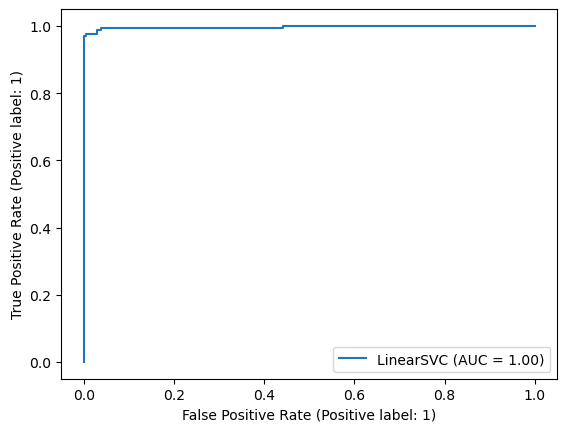

In [12]:
semi_disp = RocCurveDisplay.from_estimator(All_labeled_SVMmodel, X_train, y_train)
plt.show()

#### Confusion Matrix for training set

Training Confusion Matrix:
 [[285   0]
 [  8 161]]


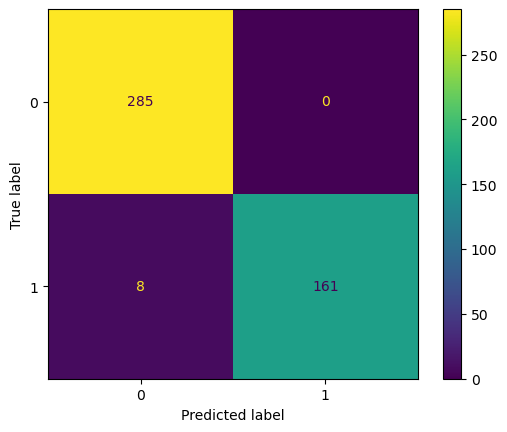

In [13]:
y_train_pred = All_labeled_SVMmodel.predict(X_train)
train_cm = confusion_matrix(y_train, y_train_pred)
print("Training Confusion Matrix:\n", train_cm)

train_disp = ConfusionMatrixDisplay(confusion_matrix=train_cm)
train_disp.plot()
plt.show()

#### ROC for test set

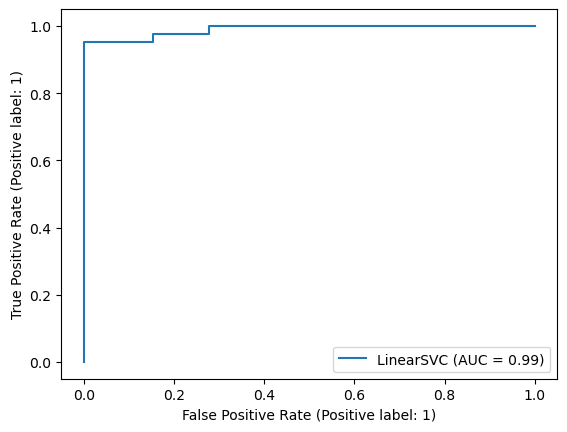

In [14]:
semi_disp = RocCurveDisplay.from_estimator(All_labeled_SVMmodel, X_test, y_test)
plt.show()

#### Confusion Matrix for test set

Test Confusion Matrix:
 [[70  2]
 [ 2 41]]


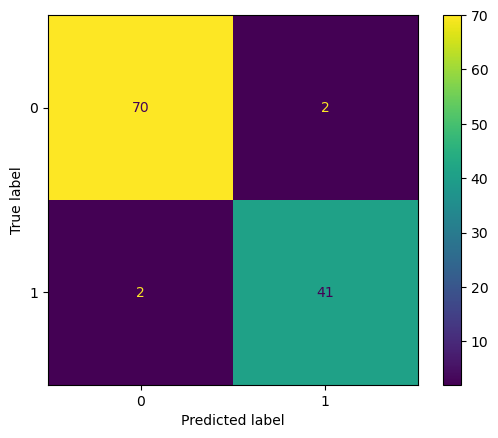

In [15]:
y_pred = All_labeled_SVMmodel.predict(X_test)
test_cm = confusion_matrix(y_test, y_pred)
print("Test Confusion Matrix:\n", test_cm)

disp = ConfusionMatrixDisplay(confusion_matrix=test_cm)
disp.plot()
plt.show()

#### (iii) Unsupervised Learning

##### (A)

##### (B)

In [16]:
X = df.drop(['ID','Class'], axis=1)
y = df.Class

#normalize scaler
scaler = MinMaxScaler()
normalized_X = pd.DataFrame(scaler.fit_transform(X))

X_pos = normalized_X[y == 0]
X_neg = normalized_X[y == 1]
y_pos = y[y == 0]
y_neg = y[y == 1]

# Split each class into training and test sets
X_pos_train, X_pos_test, y_pos_train, y_pos_test = train_test_split(X_pos, y_pos, test_size=0.2, random_state=42)
X_neg_train, X_neg_test, y_neg_train, y_neg_test = train_test_split(X_neg, y_neg, test_size=0.2, random_state=42)

X_train = pd.concat([X_pos_train,X_neg_train])
X_test = pd.concat([X_pos_test,X_neg_test])
y_train = pd.concat([y_pos_train,y_neg_train])
y_test = pd.concat([y_pos_test,y_neg_test])

In [17]:
from sklearn.cluster import KMeans

k=2
n_init=20
max_iter=2000

train_acc_list = list()
train_prec_list = list()
train_recall_list = list()
train_F1_list = list()
train_AUC_list = list()

test_acc_list = list()
test_prec_list = list()
test_recall_list = list()
test_F1_list = list()
test_AUC_list = list()

#Monte-Carlo
for m in range(30):
    if(m == 0):
        print(f"The {(m+1)}st run of Monte-Carlo Simulation:")
    elif(m == 1):
        print(f"The {(m+1)}nd run of Monte-Carlo Simulation:")
    elif(m == 2):
        print(f"The {(m+1)}rd run of Monte-Carlo Simulation:")
    else:
        print(f"The {(m+1)}th run of Monte-Carlo Simulation:")
        

    kmeans = KMeans(n_clusters=k,init='k-means++', n_init=n_init, max_iter=max_iter, random_state=42)
    kmeans.fit(X_train)
    cluster_centers = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_
    #print(cluster_labels)
            
    # 2 cluster with each data point index
    #cluster_0 = np.where(cluster_labels==0)[0]
    #print(cluster_0)
    #cluster_1 = np.where(cluster_labels==1)[0]

    
    # distance to cluster centre of each data point
    #print(kmeans.transform(X_train))
    All_dist = kmeans.transform(X_train)
    cluster_0_dist = All_dist[:,0]
    cluster_1_dist = All_dist[:,1]
    #print(cluster_0_dist)
    #print(cluster_1_dist)
    
    # find the closest 30 data points in each cluster
    closest_30_indices_c0 = np.argsort(cluster_0_dist)[:30]
    cluster_0_30p = pd.DataFrame(X_train.iloc[closest_30_indices_c0])
    closest_30_indices_c1 = np.argsort(cluster_1_dist)[:30]
    cluster_1_30p = pd.DataFrame(X_train.iloc[closest_30_indices_c1])
    print(cluster_0_30p.index)
    print(cluster_1_30p.index)
    
    # Find the true label of those 30/30 points
    true_cluster0 = y_train[cluster_0_30p.index]
    true_label_c0 = true_cluster0.mode().values[0]
    #print(true_cluster0.mode().values[0])
    true_cluster1 = y_train[cluster_1_30p.index]
    true_label_c1 = true_cluster1.mode().values[0]
    #print(true_cluster1.mode().values[0])
    
    # Fill into the pred
    cluster_labels[cluster_labels==0] = true_label_c0
    cluster_labels[cluster_labels==1] = true_label_c1
    
    
    # train prediction
    train_acc = accuracy_score(y_train, cluster_labels)
    train_precision = precision_score(y_train, cluster_labels)
    train_recall = recall_score(y_train, cluster_labels)
    train_f1_score = f1_score(y_train, cluster_labels)
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, cluster_labels)
    train_auc = auc(train_fpr,train_tpr)
    
    train_acc_list.append(train_acc)
    train_prec_list.append(train_precision)
    train_recall_list.append(train_recall)
    train_F1_list.append(train_f1_score)
    train_AUC_list.append(train_auc)
    
    
    # test part
    y_pred = kmeans.predict(X_test)
    
    test_acc = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    test_f1_score = f1_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    test_auc = auc(fpr,tpr)
    
    test_acc_list.append(test_acc)
    test_prec_list.append(test_precision)
    test_recall_list.append(test_recall)
    test_F1_list.append(test_f1_score)
    test_AUC_list.append(test_auc) 
    
    
print()
print('Train sets:')
print('The average accuracy:', np.average(train_acc_list))
print('The average precision:', np.average(train_prec_list))
print('The average recall:', np.average(train_recall_list))
print('The average F1_score:', np.average(train_F1_list))
print('The average AUC:', np.average(train_AUC_list))

The 1st run of Monte-Carlo Simulation:
Index([ 79, 362,  74, 399, 211, 367,  93, 325, 436, 249, 437, 463, 324, 420,
       483, 394, 480, 497, 195, 304, 224, 411, 346, 143,  84, 115, 478, 301,
       200, 204],
      dtype='int64')
Index([392, 433, 408, 156, 177, 498, 244,  32,  94, 328, 121,   2,  30, 516,
       283, 337, 499, 492,  85,  11, 280,  17, 432, 300,  45, 335, 168,  57,
        53,  95],
      dtype='int64')
The 2nd run of Monte-Carlo Simulation:
Index([ 79, 362,  74, 399, 211, 367,  93, 325, 436, 249, 437, 463, 324, 420,
       483, 394, 480, 497, 195, 304, 224, 411, 346, 143,  84, 115, 478, 301,
       200, 204],
      dtype='int64')
Index([392, 433, 408, 156, 177, 498, 244,  32,  94, 328, 121,   2,  30, 516,
       283, 337, 499, 492,  85,  11, 280,  17, 432, 300,  45, 335, 168,  57,
        53,  95],
      dtype='int64')
The 3rd run of Monte-Carlo Simulation:
Index([ 79, 362,  74, 399, 211, 367,  93, 325, 436, 249, 437, 463, 324, 420,
       483, 394, 480, 497, 195, 30

Index([ 79, 362,  74, 399, 211, 367,  93, 325, 436, 249, 437, 463, 324, 420,
       483, 394, 480, 497, 195, 304, 224, 411, 346, 143,  84, 115, 478, 301,
       200, 204],
      dtype='int64')
Index([392, 433, 408, 156, 177, 498, 244,  32,  94, 328, 121,   2,  30, 516,
       283, 337, 499, 492,  85,  11, 280,  17, 432, 300,  45, 335, 168,  57,
        53,  95],
      dtype='int64')
The 22th run of Monte-Carlo Simulation:
Index([ 79, 362,  74, 399, 211, 367,  93, 325, 436, 249, 437, 463, 324, 420,
       483, 394, 480, 497, 195, 304, 224, 411, 346, 143,  84, 115, 478, 301,
       200, 204],
      dtype='int64')
Index([392, 433, 408, 156, 177, 498, 244,  32,  94, 328, 121,   2,  30, 516,
       283, 337, 499, 492,  85,  11, 280,  17, 432, 300,  45, 335, 168,  57,
        53,  95],
      dtype='int64')
The 23th run of Monte-Carlo Simulation:
Index([ 79, 362,  74, 399, 211, 367,  93, 325, 436, 249, 437, 463, 324, 420,
       483, 394, 480, 497, 195, 304, 224, 411, 346, 143,  84, 115, 478,

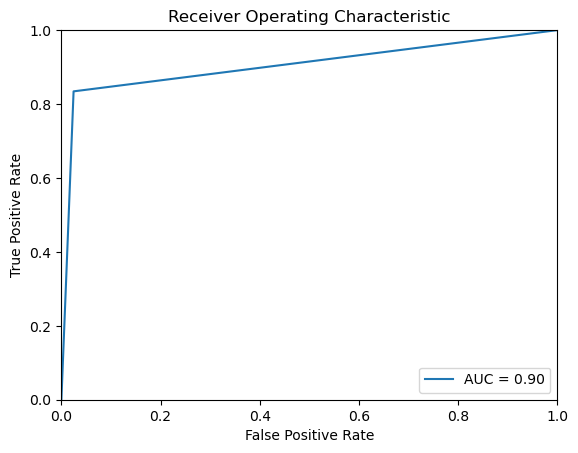

In [18]:
plt.title('Receiver Operating Characteristic')
plt.plot(train_fpr, train_tpr, label = 'AUC = %0.2f' % train_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Training Confusion Matrix:
 [[278   7]
 [ 28 141]]


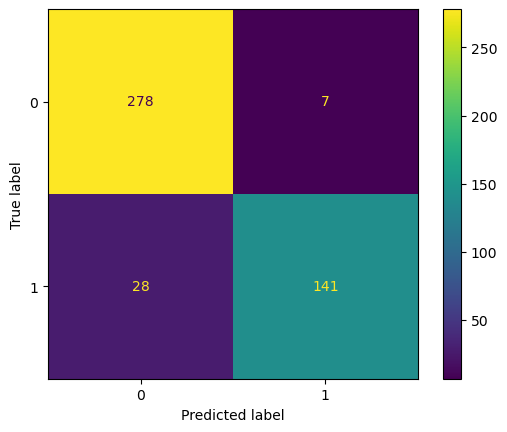

In [19]:
train_cm = confusion_matrix(y_train, cluster_labels)
print("Training Confusion Matrix:\n", train_cm)

train_disp = ConfusionMatrixDisplay(confusion_matrix=train_cm)
train_disp.plot()
plt.show()

#### (C)

In [20]:
print('Test sets:')
print('The average accuracy:', np.average(test_acc_list))
print('The average precision:', np.average(test_prec_list))
print('The average recall:', np.average(test_recall_list))
print('The average F1_score:', np.average(test_F1_list))
print('The average AUC:', np.average(test_AUC_list)) 

Test sets:
The average accuracy: 0.9478260869565216
The average precision: 0.9512195121951222
The average recall: 0.9069767441860465
The average F1_score: 0.9285714285714283
The average AUC: 0.9395994832041342


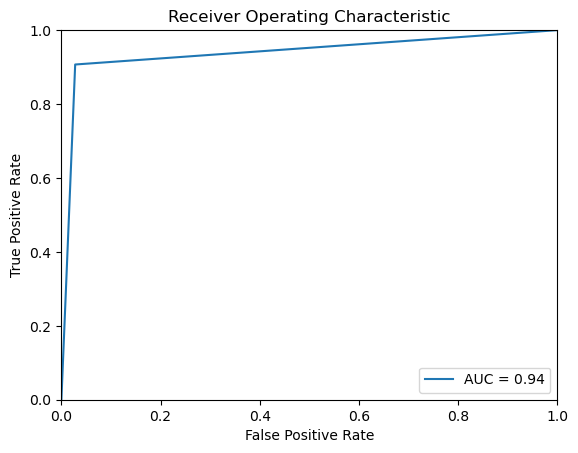

In [21]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % test_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Training Confusion Matrix:
 [[70  2]
 [ 4 39]]


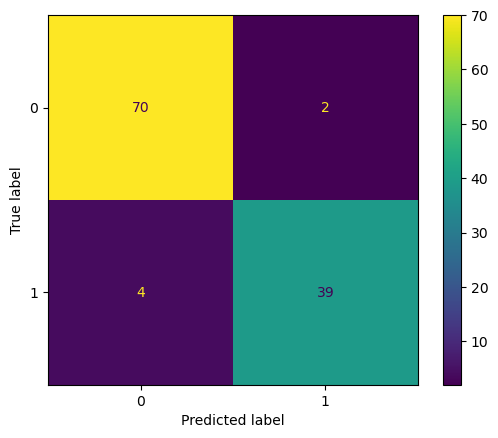

In [22]:
test_cm = confusion_matrix(y_test, y_pred)
print("Training Confusion Matrix:\n", test_cm)

train_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm)
train_disp.plot()
plt.show()

#### (iv) Spectral Clustering

In [23]:
X = df.drop(['ID','Class'], axis=1)
y = df.Class

#normalize scaler
scaler = MinMaxScaler()
normalized_X = pd.DataFrame(scaler.fit_transform(X))

X_pos = normalized_X[y == 0]
X_neg = normalized_X[y == 1]
y_pos = y[y == 0]
y_neg = y[y == 1]

# Split each class into training and test sets
X_pos_train, X_pos_test, y_pos_train, y_pos_test = train_test_split(X_pos, y_pos, test_size=0.2, random_state=42)
X_neg_train, X_neg_test, y_neg_train, y_neg_test = train_test_split(X_neg, y_neg, test_size=0.2, random_state=42)

X_train = pd.concat([X_pos_train,X_neg_train])
X_test = pd.concat([X_pos_test,X_neg_test])
y_train = pd.concat([y_pos_train,y_neg_train])
y_test = pd.concat([y_pos_test,y_neg_test])

In [24]:
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import KNeighborsClassifier

k=2
n_init=20

train_acc_list = list()
train_prec_list = list()
train_recall_list = list()
train_F1_list = list()
train_AUC_list = list()

test_acc_list = list()
test_prec_list = list()
test_recall_list = list()
test_F1_list = list()
test_AUC_list = list()

#Monte-Carlo
for m in range(30):
    if(m == 0):
        print(f"The {(m+1)}st run of Monte-Carlo Simulation:")
    elif(m == 1):
        print(f"The {(m+1)}nd run of Monte-Carlo Simulation:")
    elif(m == 2):
        print(f"The {(m+1)}rd run of Monte-Carlo Simulation:")
    else:
        print(f"The {(m+1)}th run of Monte-Carlo Simulation:")
    
    clustering = SpectralClustering(n_clusters=k, n_init=n_init,gamma=1.0, affinity='rbf')
    clustering.fit_predict(X_train)
    cluster_labels = clustering.labels_
    #print(cluster_labels)
    
    cluster_0_index = list(np.where(cluster_labels==0)[0])
    cluster_1_index = list(np.where(cluster_labels==1)[0])
#     print(cluster_0_index)
#     print(cluster_1_index)
    
    
    
    # find the random 30 data points in each cluster
    cluster_0_rand30 = random.sample(cluster_0_index,30)
    cluster_1_rand30 = random.sample(cluster_1_index,30)
    #print(cluster_0_rand30)
    #print(cluster_1_rand30)
    
    c0_rand30_datapoint = pd.DataFrame(X_train.iloc[cluster_0_rand30])
    c1_rand30_datapoint = pd.DataFrame(X_train.iloc[cluster_1_rand30])
    #print(c0_rand30_datapoint.index)
    #print(c1_rand30_datapoint.index)
    
    
    #Find the true label of those 30/30 points
    true_cluster0 = y_train[c0_rand30_datapoint.index]
    true_label_c0 = true_cluster0.mode().values[0]
    #print(true_cluster0.mode().values[0])
    true_cluster1 = y_train[c1_rand30_datapoint.index]
    true_label_c1 = true_cluster1.mode().values[0]
    #print(true_cluster1.mode().values[0])
    
    # Fill into the pred
    cluster_labels[cluster_labels==0] = true_label_c0
    cluster_labels[cluster_labels==1] = true_label_c1
    
    
    # train prediction
    train_acc = accuracy_score(y_train, cluster_labels)
    train_precision = precision_score(y_train, cluster_labels)
    train_recall = recall_score(y_train, cluster_labels)
    train_f1_score = f1_score(y_train, cluster_labels)
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, cluster_labels)
    train_auc = auc(train_fpr,train_tpr)
    
    train_acc_list.append(train_acc)
    train_prec_list.append(train_precision)
    train_recall_list.append(train_recall)
    train_F1_list.append(train_f1_score)
    train_AUC_list.append(train_auc)
    
    
    # test part
    #TODO
    #use KNN
    #y_pred = clustering.predict(X_test) #Spectral clustering has no predict
    knn = KNeighborsClassifier(n_neighbors=30)
    knn.fit(X_train, cluster_labels)
    knn_pred = knn.predict(X_test.values)
#     for i in range(len(X_test)):
#         knn_pred = knn.predict(X_test.iloc[i])
        
    
    
    test_acc = accuracy_score(y_test, knn_pred)
    test_precision = precision_score(y_test, knn_pred)
    test_recall = recall_score(y_test, knn_pred)
    test_f1_score = f1_score(y_test, knn_pred)
    fpr, tpr, thresholds = roc_curve(y_test, knn_pred)
    test_auc = auc(fpr,tpr)
    
    test_acc_list.append(test_acc)
    test_prec_list.append(test_precision)
    test_recall_list.append(test_recall)
    test_F1_list.append(test_f1_score)
    test_AUC_list.append(test_auc) 
    

print()
print('Train sets:')
print('The average accuracy:', np.average(train_acc_list))
print('The average precision:', np.average(train_prec_list))
print('The average recall:', np.average(train_recall_list))
print('The average F1_score:', np.average(train_F1_list))
print('The average AUC:', np.average(train_AUC_list))

The 1st run of Monte-Carlo Simulation:
The 2nd run of Monte-Carlo Simulation:
The 3rd run of Monte-Carlo Simulation:
The 4th run of Monte-Carlo Simulation:
The 5th run of Monte-Carlo Simulation:
The 6th run of Monte-Carlo Simulation:
The 7th run of Monte-Carlo Simulation:
The 8th run of Monte-Carlo Simulation:
The 9th run of Monte-Carlo Simulation:
The 10th run of Monte-Carlo Simulation:
The 11th run of Monte-Carlo Simulation:
The 12th run of Monte-Carlo Simulation:
The 13th run of Monte-Carlo Simulation:
The 14th run of Monte-Carlo Simulation:
The 15th run of Monte-Carlo Simulation:
The 16th run of Monte-Carlo Simulation:
The 17th run of Monte-Carlo Simulation:
The 18th run of Monte-Carlo Simulation:
The 19th run of Monte-Carlo Simulation:
The 20th run of Monte-Carlo Simulation:
The 21th run of Monte-Carlo Simulation:
The 22th run of Monte-Carlo Simulation:
The 23th run of Monte-Carlo Simulation:
The 24th run of Monte-Carlo Simulation:
The 25th run of Monte-Carlo Simulation:
The 26th 

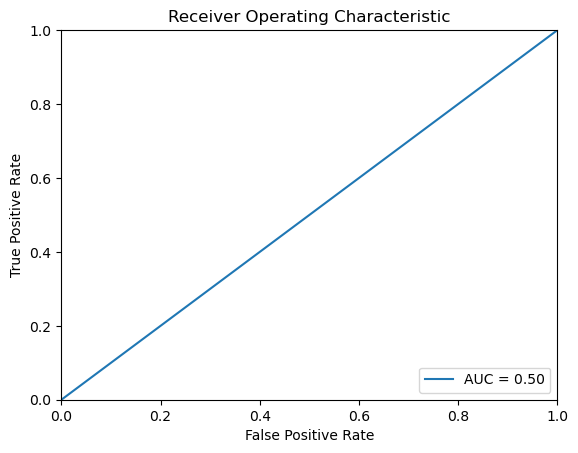

In [25]:
plt.title('Receiver Operating Characteristic')
plt.plot(train_fpr, train_tpr, label = 'AUC = %0.2f' % train_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Training Confusion Matrix:
 [[285   0]
 [169   0]]


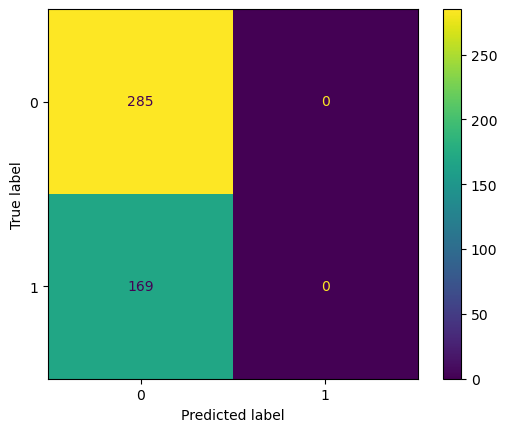

In [26]:
train_cm = confusion_matrix(y_train, cluster_labels)
print("Training Confusion Matrix:\n", train_cm)

train_disp = ConfusionMatrixDisplay(confusion_matrix=train_cm)
train_disp.plot()
plt.show()

In [27]:
print('Test sets:')
print('The average accuracy:', np.average(test_acc_list))
print('The average precision:', np.average(test_prec_list))
print('The average recall:', np.average(test_recall_list))
print('The average F1_score:', np.average(test_F1_list))
print('The average AUC:', np.average(test_AUC_list)) 

Test sets:
The average accuracy: 0.7721739130434783
The average precision: 0.6
The average recall: 0.39069767441860465
The average F1_score: 0.4732394366197184
The average AUC: 0.6953488372093024


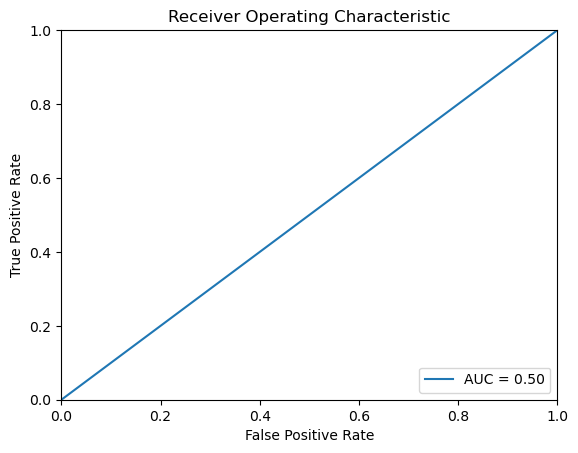

In [28]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % test_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Training Confusion Matrix:
 [[72  0]
 [43  0]]


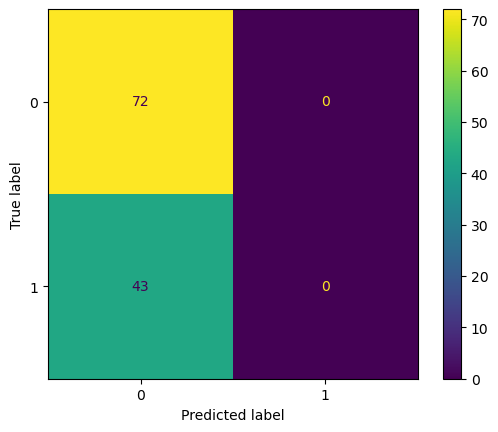

In [29]:
test_cm = confusion_matrix(y_test, knn_pred)
print("Training Confusion Matrix:\n", test_cm)

train_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm)
train_disp.plot()
plt.show()

#### (iv) Compare

In my experiment, 

<b>i. Supervised Learning:


Train sets:<br>
The average accuracy: 0.9889867841409693<br>
The average precision: 0.9880952380952379<br>
The average recall: 0.982248520710059<br>
The average F1_score: 0.9851632047477745<br>
The average AUC: 0.9876154884252053<br>

Test sets:<br>
The average accuracy: 0.9565217391304347<br>
The average precision: 0.9318181818181821<br>
The average recall: 0.9534883720930233<br>
The average F1_score: 0.942528735632184<br>
The average AUC: 0.9559108527131781<br>

<b>ii. Semi-Supervised Learning:
    
Train sets:<br>
The average accuracy: 0.9823788546255509<br>
The average precision: 1.0<br>
The average recall: 0.9526627218934914<br>
The average F1_score: 0.9757575757575759<br>
The average AUC: 0.9763313609467453<br>

Test sets:<br>
The average accuracy: 0.9652173913043475<br>
The average precision: 0.9534883720930233<br>
The average recall: 0.9534883720930233<br>
The average F1_score: 0.9534883720930233<br>
The average AUC: 0.9628552971576229<br>

<b>iii. Unsupervised Learning:

<b>Kmeans clustering:</b><br>
Train sets:<br>
The average accuracy: 0.9229074889867841<br>
The average precision: 0.9527027027027025<br>
The average recall: 0.834319526627219<br>
The average F1_score: 0.889589905362776<br>
The average AUC: 0.9048790615592238<br>

Test sets:<br>
The average accuracy: 0.9478260869565216<br>
The average precision: 0.9512195121951222<br>
The average recall: 0.9069767441860465<br>
The average F1_score: 0.9285714285714283<br>
The average AUC: 0.9395994832041342<br>


<b>Spectral clustering:</b>
<br>
Train sets:<br>
The average accuracy: 0.7612334801762116<br>
The average precision: 0.5831775700934579<br>
The average recall: 0.3692307692307692<br>
The average F1_score: 0.45217391304347826<br>
The average AUC: 0.6814574898785426<br>

Test sets:<br>
The average accuracy: 0.7721739130434783<br>
The average precision: 0.6<br>
The average recall: 0.39069767441860465<br>
The average F1_score: 0.4732394366197184<br>
The average AUC: 0.6953488372093024<br>
    
Indeed, the Unsupervised Learning underperforms in this situation and the Supervised Learning works better than Semi-Supervised Learning does.

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

In [30]:
df = pd.read_csv('../data/data_banknote_authentication.txt', header=None)
df

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [31]:
columns_names = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']
df.columns = columns_names
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [32]:
X = df.drop(['Class'], axis=1)
y = df.Class

#### Split train and test points

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=900, random_state=42)

### (b) Repeat each of the following two procedures 50 times

#### (i) Passive

In [34]:
pas_avg_test_errors = list()
pas_all90_test_errors = list()
for i in range(50):
    if(i == 0):
        print(f"The {(i+1)}st run:")
    elif(i == 1):
        print(f"The {(i+1)}nd run:")
    elif(i == 2):
        print(f"The {(i+1)}rd run:")
    else:
        print(f"The {(i+1)}th run:")
    
    X_train_rand = X_train
    y_train_rand = y_train
    
    new_X_train = pd.DataFrame()
    new_y_train = pd.DataFrame()
    
    test_errors = list()
    
    for j in range(90):
        if(j == 0):
            print(f"The {(j+1)}st SVM:")
        elif(j == 1):
            print(f"The {(j+1)}nd SVM:")
        elif(j == 2):
            print(f"The {(j+1)}rd SVM:")
        else:
            print(f"The {(j+1)}th SVM:")
        # pick random 10 points
        pool_rand10 = random.sample(list(X_train_rand.index),10)
        #print(pool_rand10)
        pool_rand10_datapoint = pd.DataFrame(X_train_rand.loc[pool_rand10])
        #print(pool_rand10_datapoint.index)
        

        # new X_train, y_train
        new_X_train = pd.concat([new_X_train, pool_rand10_datapoint])
        new_y_train = pd.concat([new_y_train, y_train_rand[pool_rand10_datapoint.index]])
        #print(X_train_rand10)
        #print(y_train_rand10)
        
        X_train_rand = X_train_rand.drop(pool_rand10)
        y_train_rand = y_train_rand.drop(pool_rand10)

        #L1-penalized SVM
        SVM_model = LinearSVC(penalty="l1", dual=False, max_iter=20000)
        SVM_model.fit(new_X_train, new_y_train)

        # C: weight of the SVM penalty(lambda)
        C = np.logspace(-6,6,10)
        param_grid = {'C':C}

        grid_search = GridSearchCV(estimator=SVM_model, param_grid=param_grid, cv=5, scoring='accuracy')
        grid_search.fit(new_X_train, new_y_train)

        # Evaluate model performance
        best_C = grid_search.best_params_['C']
        print("Best C:", best_C)

        # Train final model
        best_C_SVMmodel = LinearSVC(penalty="l1", dual=False, max_iter=20000, C=best_C)
        best_C_SVMmodel.fit(new_X_train, new_y_train)

        # train prediction
        y_train_pred = best_C_SVMmodel.predict(new_X_train)
        

        # test prediction
        y_pred = best_C_SVMmodel.predict(X_test)
        error = 1-accuracy_score(y_test, y_pred)
        test_errors.append(error)
        print("Test error of this SVM model:", error)
        print()
        
    pas_all90_test_errors.append(test_errors)
        
    pas_avg_test_errors.append(np.mean(test_errors))
    print("Average test error of 90 SVMs in this run:",np.mean(test_errors))
    print()

print("All average test error:", pas_avg_test_errors)

The 1st run:
The 1st SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.10805084745762716

The 2nd SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.07415254237288138

The 3rd SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.0847457627118644

The 4th SVM:
Best C: 100.0
Test error of this SVM model: 0.02754237288135597

The 5th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.03177966101694918

The 6th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.03177966101694918

The 7th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.03389830508474578

The 8th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.0402542372881356

The 9th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.03389830508474578

The 10th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.014830508474576232

The 11th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.02118644067796615

Best C: 0.21544346900318823
Test error of this SVM model: 0.03601694915254239

The 4th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.008474576271186418

The 5th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 6th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 7th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.008474576271186418

The 8th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.008474576271186418

The 9th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.006355932203389814

The 10th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 11th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 12th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 13th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.0127118644067

Best C: 4.641588833612772
Test error of this SVM model: 0.03601694915254239

The 4th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.02330508474576276

The 5th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.03389830508474578

The 6th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.05932203389830504

The 7th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.03389830508474578

The 8th SVM:
Best C: 100.0
Test error of this SVM model: 0.016949152542372836

The 9th SVM:
Best C: 100.0
Test error of this SVM model: 0.021186440677966156

The 10th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.016949152542372836

The 11th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 12th SVM:
Best C: 1000000.0
Test error of this SVM model: 0.021186440677966156

The 13th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.014830508474576232

The 14th SVM:
Best C: 0.215443469003188

Test error of this SVM model: 0.014830508474576232

The 3rd SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.02330508474576276

The 4th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.021186440677966156

The 5th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.021186440677966156

The 6th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.008474576271186418

The 7th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.014830508474576232

The 8th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.014830508474576232

The 9th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.014830508474576232

The 10th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.014830508474576232

The 11th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.014830508474576232

The 12th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.014830508474576232

The 13th SVM:
Best

Best C: 0.21544346900318823
Test error of this SVM model: 0.016949152542372836

The 3rd SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.03389830508474578

The 4th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.01906779661016944

The 5th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.014830508474576232

The 6th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 7th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 8th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 9th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.025423728813559365

The 10th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 11th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 12th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.0105932203389

Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 6th SVM:
Best C: 2154.434690031878
Test error of this SVM model: 0.03389830508474578

The 7th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.025423728813559365

The 8th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.025423728813559365

The 9th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.025423728813559365

The 10th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.025423728813559365

The 11th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.025423728813559365

The 12th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.025423728813559365

The 13th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.025423728813559365

The 14th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.025423728813559365

The 15th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.0148305

Best C: 4.641588833612772
Test error of this SVM model: 0.03389830508474578

The 6th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 7th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 8th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 9th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.025423728813559365

The 10th SVM:
Best C: 100.0
Test error of this SVM model: 0.021186440677966156

The 11th SVM:
Best C: 100.0
Test error of this SVM model: 0.008474576271186418

The 12th SVM:
Best C: 100.0
Test error of this SVM model: 0.008474576271186418

The 13th SVM:
Best C: 100.0
Test error of this SVM model: 0.008474576271186418

The 14th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.008474576271186418

The 15th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.008474576271186418

The 16th SVM:
Best C: 0.21544346900318823
Test 

Best C: 2154.434690031878
Test error of this SVM model: 0.016949152542372836

The 6th SVM:
Best C: 2154.434690031878
Test error of this SVM model: 0.016949152542372836

The 7th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.01906779661016944

The 8th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.01906779661016944

The 9th SVM:
Best C: 100.0
Test error of this SVM model: 0.02330508474576276

The 10th SVM:
Best C: 100.0
Test error of this SVM model: 0.02330508474576276

The 11th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.021186440677966156

The 12th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.021186440677966156

The 13th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.021186440677966156

The 14th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.021186440677966156

The 15th SVM:
Best C: 100.0
Test error of this SVM model: 0.02330508474576276

The 16th SVM:
Best C: 4.641588833612772
Tes

Best C: 0.21544346900318823
Test error of this SVM model: 0.03601694915254239

The 7th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.0402542372881356

The 8th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 9th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 10th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 11th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 12th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 13th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 14th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 15th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.008474576271186418

The 16th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.00847457627118

Best C: 0.21544346900318823
Test error of this SVM model: 0.03601694915254239

The 6th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.03601694915254239

The 7th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 8th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 9th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 10th SVM:
Best C: 100.0
Test error of this SVM model: 0.01906779661016944

The 11th SVM:
Best C: 100.0
Test error of this SVM model: 0.01906779661016944

The 12th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 13th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.016949152542372836

The 14th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.016949152542372836

The 15th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 16th SVM:
Best C: 4.641588

Best C: 4.641588833612772
Test error of this SVM model: 0.044491525423728806

The 6th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.02330508474576276

The 7th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.02330508474576276

The 8th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.014830508474576232

The 9th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.014830508474576232

The 10th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.014830508474576232

The 11th SVM:
Best C: 100.0
Test error of this SVM model: 0.014830508474576232

The 12th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.01906779661016944

The 13th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.01906779661016944

The 14th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 15th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 16th SVM

Best C: 100.0
Test error of this SVM model: 0.016949152542372836

The 5th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.05720338983050843

The 6th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.044491525423728806

The 7th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.0402542372881356

The 8th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.03601694915254239

The 9th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.03601694915254239

The 10th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.03601694915254239

The 11th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.03389830508474578

The 12th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.03177966101694918

The 13th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.03177966101694918

The 14th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.014830508474576232

The 15th S

Best C: 0.21544346900318823
Test error of this SVM model: 0.014830508474576232

The 4th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.021186440677966156

The 5th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.014830508474576232

The 6th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.016949152542372836

The 7th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.014830508474576232

The 8th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.014830508474576232

The 9th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.014830508474576232

The 10th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.014830508474576232

The 11th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 12th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 13th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593

Best C: 2154.434690031878
Test error of this SVM model: 0.08686440677966101

The 4th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.03601694915254239

The 5th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.021186440677966156

The 6th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.021186440677966156

The 7th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.016949152542372836

The 8th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.016949152542372836

The 9th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 10th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.016949152542372836

The 11th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.016949152542372836

The 12th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.016949152542372836

The 13th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.016949152542372836



Best C: 0.21544346900318823
Test error of this SVM model: 0.025423728813559365

The 4th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.02754237288135597

The 5th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.029661016949152574

The 6th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.016949152542372836

The 7th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.008474576271186418

The 8th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 9th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.008474576271186418

The 10th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 11th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 12th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.008474576271186418

The 13th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.01059322033

Best C: 0.21544346900318823
Test error of this SVM model: 0.05084745762711862

The 3rd SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.029661016949152574

The 4th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 5th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.04661016949152541

The 6th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.016949152542372836

The 7th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.016949152542372836

The 8th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.016949152542372836

The 9th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.016949152542372836

The 10th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.016949152542372836

The 11th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.008474576271186418

The 12th SVM:
Best C: 100.0
Test error of this SVM model: 0.012711864406779627

The 13th SV

Best C: 0.21544346900318823
Test error of this SVM model: 0.08686440677966101

The 3rd SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.11228813559322037

The 4th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.02330508474576276

The 5th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 6th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.016949152542372836

The 7th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.021186440677966156

The 8th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.016949152542372836

The 9th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.014830508474576232

The 10th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.014830508474576232

The 11th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.014830508474576232

The 12th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406

Best C: 4.641588833612772
Test error of this SVM model: 0.025423728813559365

The 3rd SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 4th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 5th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 6th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 7th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 8th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 9th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 10th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 11th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.008474576271186418

The 12th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864

Best C: 0.21544346900318823
Test error of this SVM model: 0.021186440677966156

The 3rd SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.021186440677966156

The 4th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.025423728813559365

The 5th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.014830508474576232

The 6th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.016949152542372836

The 7th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.021186440677966156

The 8th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.016949152542372836

The 9th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 10th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 11th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.014830508474576232

The 12th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864

Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

Average test error of 90 SVMs in this run: 0.013559322033898279

The 20th run:
The 1st SVM:
Best C: 100.0
Test error of this SVM model: 0.06355932203389836

The 2nd SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.02330508474576276

The 3rd SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.016949152542372836

The 4th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.014830508474576232

The 5th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 6th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.014830508474576232

The 7th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.02754237288135597

The 8th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.02754237288135597

The 9th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.02754237288135597

The 10th SVM:
Best C: 0.2154434

Best C: 100.0
Test error of this SVM model: 0.010593220338983023

Average test error of 90 SVMs in this run: 0.013370998116760808

The 21th run:
The 1st SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.13983050847457623

The 2nd SVM:
Best C: 100.0
Test error of this SVM model: 0.029661016949152574

The 3rd SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.014830508474576232

The 4th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.021186440677966156

The 5th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.025423728813559365

The 6th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 7th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 8th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 9th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 10th SVM:
Best C: 0.21544346900

Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 90th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

Average test error of 90 SVMs in this run: 0.01278248587570619

The 22th run:
The 1st SVM:
Best C: 2154.434690031878
Test error of this SVM model: 0.14406779661016944

The 2nd SVM:
Best C: 1000000.0
Test error of this SVM model: 0.02330508474576276

The 3rd SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.06779661016949157

The 4th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.07838983050847459

The 5th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.07838983050847459

The 6th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.07838983050847459

The 7th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.03601694915254239

The 8th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.021186440677966156

The 9th SVM:
Best C: 4.64

Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 89th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 90th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

Average test error of 90 SVMs in this run: 0.015795668549905814

The 23th run:
The 1st SVM:
Best C: 46415.888336127726
Test error of this SVM model: 0.15254237288135597

The 2nd SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.048728813559322015

The 3rd SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.01906779661016944

The 4th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.01906779661016944

The 5th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 6th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.016949152542372836

The 7th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 8th SVM:
Best C: 0.21544346900318823
Test error of

Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 88th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 89th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 90th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

Average test error of 90 SVMs in this run: 0.013441619585687355

The 24th run:
The 1st SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.19703389830508478

The 2nd SVM:
Best C: 46415.888336127726
Test error of this SVM model: 0.008474576271186418

The 3rd SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.02330508474576276

The 4th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 5th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 6th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.016949152542372836

The 7th SVM:
Best C: 0.21544346900318823
Test erro

Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 87th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 88th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 89th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 90th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

Average test error of 90 SVMs in this run: 0.014124293785310707

The 25th run:
The 1st SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.17372881355932202

The 2nd SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.05084745762711862

The 3rd SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.05084745762711862

The 4th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.01906779661016944

The 5th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 6th SVM:
Best C: 0.21544346900318823
Test error of t

Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 86th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 87th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 88th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 89th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 90th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

Average test error of 90 SVMs in this run: 0.014924670433144977

The 26th run:
The 1st SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.17372881355932202

The 2nd SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.13559322033898302

The 3rd SVM:
Best C: 2154.434690031878
Test error of this SVM model: 0.10805084745762716

The 4th SVM:
Best C: 0.01
Test error of this SVM model: 0.17372881355932202

The 5th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.03813559322033899

Th

Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 86th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 87th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 88th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 89th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 90th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

Average test error of 90 SVMs in this run: 0.01899717514124291

The 27th run:
The 1st SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.11864406779661019

The 2nd SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.08686440677966101

The 3rd SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.09745762711864403

The 4th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.0402542372881356

The 5th SVM:
Best C

Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 83th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 84th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 85th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 86th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 87th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 88th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 89th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 90th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

Average test error of 90 SVMs in this run: 0.01454802259887003

The 28th run:
The 1st SVM:
Best C: 46415.888336127726
Test error of this SVM model: 0.17372881355932202

The 2

Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 82th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 83th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 84th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 85th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 86th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 87th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 88th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 89th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 90th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

Average test error of 90 SVMs in this run: 0.014806967984934059

The 29th run:
T

Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 80th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 81th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 82th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 83th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 84th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 85th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 86th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 87th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 88th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 89th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 90th SVM:
Best C: 4.641588833612

Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 79th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 80th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 81th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 82th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 83th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 84th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 85th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 86th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 87th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 88th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 89

Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 78th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 79th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 80th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 81th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 82th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 83th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 84th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 85th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 86th SVM:
Best C: 46415.888336127726
Test error of this SVM model: 0.010593220338983023

The 87th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 88th SVM:
Best C: 100.0
T

Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 77th SVM:
Best C: 100.0
Test error of this SVM model: 0.012711864406779627

The 78th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 79th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 80th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 81th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 82th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 83th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 84th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 85th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 86th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 87th SVM:
Best C: 0.21544346

Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 76th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 77th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 78th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 79th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 80th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 81th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 82th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 83th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 84th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 85th SVM:
Best C: 1000000.0
Test error of this SVM model: 0.010593220338983023

The 86th SVM:
Best C: 2154.434690031878
Test error of this SVM mod

Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 75th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 76th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 77th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 78th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 79th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 80th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 81th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 82th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 83th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 84th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593

Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 72th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 73th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 74th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 75th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 76th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 77th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 78th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 79th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 80th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 81th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 82th SVM

Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 70th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 71th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 72th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 73th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 74th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 75th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 76th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 77th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 78th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 79th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.

Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 70th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 71th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 72th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 73th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 74th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 75th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 76th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 77th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 78th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 79th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

Th

Best C: 46415.888336127726
Test error of this SVM model: 0.010593220338983023

The 69th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 70th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 71th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 72th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 73th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 74th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 75th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 76th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 77th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 78th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 79th SVM:
Best C: 0.21544346900318823

Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 69th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 70th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 71th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 72th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 73th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 74th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 75th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 76th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 77th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 78th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

Th

Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 68th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 69th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 70th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 71th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 72th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 73th SVM:
Best C: 2154.434690031878
Test error of this SVM model: 0.010593220338983023

The 74th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 75th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 76th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 77th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 78th SVM:
Best C: 4.641588833612772
Test error of this SVM

Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 68th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 69th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 70th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 71th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 72th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 73th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 74th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 75th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 76th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 77th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406

Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 67th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 68th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 69th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 70th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 71th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 72th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 73th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 74th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 75th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 76th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

Th

Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 68th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 69th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 70th SVM:
Best C: 100.0
Test error of this SVM model: 0.012711864406779627

The 71th SVM:
Best C: 100.0
Test error of this SVM model: 0.012711864406779627

The 72th SVM:
Best C: 100.0
Test error of this SVM model: 0.012711864406779627

The 73th SVM:
Best C: 100.0
Test error of this SVM model: 0.012711864406779627

The 74th SVM:
Best C: 100.0
Test error of this SVM model: 0.012711864406779627

The 75th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.014830508474576232

The 76th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 77th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.014830508474576232

The 78th SVM:
Best C: 4.641588833612772
Test error of this SVM

Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 68th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 69th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 70th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 71th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 72th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 73th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 74th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 75th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 76th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 77th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

Th

Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 66th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 67th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 68th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 69th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 70th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 71th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 72th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 73th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 74th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 75th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 76th SVM:
Best C: 100.0
Test error of this

Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 65th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 66th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 67th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 68th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 69th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 70th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 71th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 72th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 73th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 74th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.

Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 63th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 64th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 65th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 66th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 67th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 68th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 69th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 70th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 71th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 72th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.

Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 60th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 61th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 62th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 63th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 64th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 65th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 66th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 67th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 68th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 69th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.

Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 58th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 59th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 60th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 61th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 62th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 63th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 64th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 65th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 66th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 67th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.0105932203389830

Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 56th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 57th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 58th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 59th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 60th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 61th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 62th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 63th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 64th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.010593220338983023

The 65th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.

In [35]:
avg_error_df = pd.DataFrame(pas_avg_test_errors, columns=['Avg test error of each run'])
avg_error_df.index.name = 'run'
avg_error_df.index += 1
avg_error_df

,Avg test error of each run
run,
1,0.016737
2,0.011770
3,0.015042
4,0.012712
5,0.011040
6,0.014548
7,0.012265
8,0.014713
9,0.015137


#### (ii) Active

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=900, random_state=42)

In [37]:
def all_same_class(x:list):
    for i in x[1:]:
        if i==x[0]:
            continue
        else:
            return False

    return True

In [38]:
act_avg_test_errors = list()
act_all90_test_errors = list()
for i in range(50):
    if(i == 0):
        print(f"The {(i+1)}st run:")
    elif(i == 1):
        print(f"The {(i+1)}nd run:")
    elif(i == 2):
        print(f"The {(i+1)}rd run:")
    else:
        print(f"The {(i+1)}th run:")
    
    X_train_pool = X_train
    y_train_pool = y_train
    
    test_errors = list()
    
    
    for j in range(90):
        if(j == 0):
            print(f"The {(j+1)}st SVM:")
            
            # If all selected data points are from one class, select another set of 10 data points randomly.
            flag = True
            # pick random 10 points
            while(flag):
                pool_rand10 = random.sample(list(X_train_pool.index),10)
                pool_rand10_datapoint = pd.DataFrame(X_train_pool.loc[pool_rand10])
                print(y_train_pool.loc[pool_rand10])
                flag = all_same_class(list(y_train_pool.loc[pool_rand10]))

            new_X_train = pool_rand10_datapoint
            new_y_train = pd.DataFrame(y_train_pool.loc[pool_rand10])

            X_train_pool = X_train_pool.drop(pool_rand10)
            y_train_pool = y_train_pool.drop(pool_rand10)
            
            
            #L1-penalized SVM
            act_SVM_model = LinearSVC(penalty="l1", dual=False, max_iter=20000)
            act_SVM_model.fit(new_X_train, new_y_train)


            # C: weight of the SVM penalty(lambda)
            C = np.logspace(-6,6,10)
            param_grid = {'C':C}

            grid_search = GridSearchCV(estimator=act_SVM_model, param_grid=param_grid, cv=5, scoring='accuracy')
            grid_search.fit(new_X_train, new_y_train)

            # Evaluate model performance
            best_C = grid_search.best_params_['C']
            print("Best C:", best_C)
    
        
            # Train final model
            act_best_SVMmodel = LinearSVC(penalty="l1", dual=False, max_iter=20000, C=best_C)
            act_best_SVMmodel.fit(new_X_train, new_y_train)

            # Train prediction
            y_train_pred = act_best_SVMmodel.predict(new_X_train)
        

            # Test prediction
            y_pred = act_best_SVMmodel.predict(X_test)
            error = 1-accuracy_score(y_test, y_pred)
            test_errors.append(error)
            print("Test error of this SVM model:", error)
            print()
            
            
        else:
            if(j == 1):
                print(f"The {(j+1)}nd SVM:")
            elif(j == 2):
                print(f"The {(j+1)}rd SVM:")
            else:
                print(f"The {(j+1)}th SVM:")         
            

            # Train SVM model with unlabeled data
            act_best_SVMmodel = LinearSVC(penalty="l1", dual=False, max_iter=2000, C=best_C)
            act_best_SVMmodel.fit(new_X_train, new_y_train)

            C = np.logspace(-6,6,10)
            param_grid = {'C':C}
            SVM_CV = GridSearchCV(estimator=act_best_SVMmodel, param_grid=param_grid, cv=5, scoring='accuracy')
            SVM_CV.fit(new_X_train, new_y_train)
            
            # pick closest 10 points
            closest10_indices = list(np.argsort(SVM_CV.decision_function(X_train_pool))[:10]) #return index
            #print(closest10_indices)
            
            closest10_point = pd.DataFrame(X_train_pool.iloc[closest10_indices,:])
            #print(closest10_point)

            closest10_label = pd.DataFrame(y_train_pool.iloc[closest10_indices])
            
            #new X_train, y_train
            new_y_train = pd.concat([new_y_train, closest10_label])
            new_X_train = pd.concat([new_X_train, closest10_point],axis=0)


            X_train_pool = X_train_pool.drop(closest10_point.index)
            y_train_pool = y_train_pool.drop(closest10_point.index)
            
        
            #L1-penalized SVM
            act_SVM_model = LinearSVC(penalty="l1", dual=False, max_iter=20000)
            act_SVM_model.fit(new_X_train, new_y_train)


            # C: weight of the SVM penalty(lambda)
            C = np.logspace(-6,6,10)
            param_grid = {'C':C}

            act_grid_search = GridSearchCV(estimator=act_SVM_model, param_grid=param_grid, cv=5, scoring='accuracy')
            act_grid_search.fit(new_X_train, new_y_train)

            # Evaluate model performance
            best_C = act_grid_search.best_params_['C']
            print("Best C:", best_C)
    
        
            # Train final model
            act_best_SVMmodel = LinearSVC(penalty="l1", dual=False, max_iter=20000, C=best_C)
            act_best_SVMmodel.fit(new_X_train, new_y_train)

            # Train prediction
            y_train_pred = act_best_SVMmodel.predict(new_X_train)
        

            # Test prediction
            y_pred = act_best_SVMmodel.predict(X_test)
            error = 1-accuracy_score(y_test, y_pred)
            test_errors.append(error)
            print("Test error of this SVM model:", error)
            print()
            
    act_all90_test_errors.append(test_errors)
    
    act_avg_test_errors.append(np.mean(test_errors))
    print("Average test error of 90 SVMs in this run:",np.mean(test_errors))
    print()

print("All average test error:", act_avg_test_errors)

The 1st run:
The 1st SVM:
474     0
360     0
272     0
1164    1
762     1
1062    1
1334    1
1283    1
2       0
1053    1
Name: Class, dtype: int64
Best C: 4.641588833612772
Test error of this SVM model: 0.10805084745762716

The 2nd SVM:
Best C: 0.01
Test error of this SVM model: 0.17372881355932202

The 3rd SVM:
Best C: 2154.434690031878
Test error of this SVM model: 0.08898305084745761

The 4th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.1313559322033898

The 5th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.1313559322033898

The 6th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.1313559322033898

The 7th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.1313559322033898

The 8th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.1313559322033898

The 9th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.1313559322033898

The 10th SVM:
Best C: 0.21544346900318823
Test error of th

Best C: 100.0
Test error of this SVM model: 0.025423728813559365

The 3rd SVM:
Best C: 46415.888336127726
Test error of this SVM model: 0.07627118644067798

The 4th SVM:
Best C: 46415.888336127726
Test error of this SVM model: 0.07627118644067798

The 5th SVM:
Best C: 2154.434690031878
Test error of this SVM model: 0.07415254237288138

The 6th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.0805084745762712

The 7th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.0805084745762712

The 8th SVM:
Best C: 2154.434690031878
Test error of this SVM model: 0.07627118644067798

The 9th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.025423728813559365

The 10th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.025423728813559365

The 11th SVM:
Best C: 0.01
Test error of this SVM model: 0.13983050847457623

The 12th SVM:
Best C: 0.01
Test error of this SVM model: 0.14194915254237284

The 13th SVM:
Best C: 2154.434690031878
Test error 

Best C: 1000000.0
Test error of this SVM model: 0.05084745762711862

The 7th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.044491525423728806

The 8th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.044491525423728806

The 9th SVM:
Best C: 100.0
Test error of this SVM model: 0.05084745762711862

The 10th SVM:
Best C: 100.0
Test error of this SVM model: 0.05084745762711862

The 11th SVM:
Best C: 1000000.0
Test error of this SVM model: 0.05084745762711862

The 12th SVM:
Best C: 100.0
Test error of this SVM model: 0.05084745762711862

The 13th SVM:
Best C: 100.0
Test error of this SVM model: 0.044491525423728806

The 14th SVM:
Best C: 100.0
Test error of this SVM model: 0.044491525423728806

The 15th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.044491525423728806

The 16th SVM:
Best C: 100.0
Test error of this SVM model: 0.044491525423728806

The 17th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.02754237288135597

The 18t

Best C: 0.01
Test error of this SVM model: 0.17372881355932202

The 12th SVM:
Best C: 0.01
Test error of this SVM model: 0.17372881355932202

The 13th SVM:
Best C: 0.01
Test error of this SVM model: 0.17372881355932202

The 14th SVM:
Best C: 0.01
Test error of this SVM model: 0.17372881355932202

The 15th SVM:
Best C: 0.01
Test error of this SVM model: 0.17372881355932202

The 16th SVM:
Best C: 0.01
Test error of this SVM model: 0.17372881355932202

The 17th SVM:
Best C: 0.01
Test error of this SVM model: 0.17372881355932202

The 18th SVM:
Best C: 0.01
Test error of this SVM model: 0.17372881355932202

The 19th SVM:
Best C: 0.01
Test error of this SVM model: 0.17372881355932202

The 20th SVM:
Best C: 0.01
Test error of this SVM model: 0.17372881355932202

The 21th SVM:
Best C: 0.01
Test error of this SVM model: 0.17372881355932202

The 22th SVM:
Best C: 0.01
Test error of this SVM model: 0.17372881355932202

The 23th SVM:
Best C: 0.01
Test error of this SVM model: 0.17372881355932202



Best C: 4.641588833612772
Test error of this SVM model: 0.05084745762711862

The 15th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.05084745762711862

The 16th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.05084745762711862

The 17th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.05084745762711862

The 18th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.05084745762711862

The 19th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.05084745762711862

The 20th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.05084745762711862

The 21th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.05084745762711862

The 22th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.05084745762711862

The 23th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.048728813559322015

The 24th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.048728813559322015

The 25th SV

Best C: 0.21544346900318823
Test error of this SVM model: 0.0826271186440678

The 17th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.0826271186440678

The 18th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.0826271186440678

The 19th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.0826271186440678

The 20th SVM:
Best C: 0.01
Test error of this SVM model: 0.13983050847457623

The 21th SVM:
Best C: 0.01
Test error of this SVM model: 0.14194915254237284

The 22th SVM:
Best C: 0.01
Test error of this SVM model: 0.14194915254237284

The 23th SVM:
Best C: 0.01
Test error of this SVM model: 0.14618644067796616

The 24th SVM:
Best C: 0.01
Test error of this SVM model: 0.14830508474576276

The 25th SVM:
Best C: 0.01
Test error of this SVM model: 0.14830508474576276

The 26th SVM:
Best C: 0.01
Test error of this SVM model: 0.15466101694915257

The 27th SVM:
Best C: 0.01
Test error of this SVM model: 0.15254237288135597

The 28th SVM:
Best C: 

Best C: 4.641588833612772
Test error of this SVM model: 0.014830508474576232

The 18th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.014830508474576232

The 19th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.014830508474576232

The 20th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.014830508474576232

The 21th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.014830508474576232

The 22th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.014830508474576232

The 23th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.014830508474576232

The 24th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.014830508474576232

The 25th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.014830508474576232

The 26th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.014830508474576232

The 27th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.014830508474576232

Th

Best C: 2154.434690031878
Test error of this SVM model: 0.052966101694915224

The 19th SVM:
Best C: 2154.434690031878
Test error of this SVM model: 0.052966101694915224

The 20th SVM:
Best C: 2154.434690031878
Test error of this SVM model: 0.05720338983050843

The 21th SVM:
Best C: 46415.888336127726
Test error of this SVM model: 0.052966101694915224

The 22th SVM:
Best C: 2154.434690031878
Test error of this SVM model: 0.05508474576271183

The 23th SVM:
Best C: 2154.434690031878
Test error of this SVM model: 0.06144067796610164

The 24th SVM:
Best C: 1000000.0
Test error of this SVM model: 0.052966101694915224

The 25th SVM:
Best C: 2154.434690031878
Test error of this SVM model: 0.06144067796610164

The 26th SVM:
Best C: 46415.888336127726
Test error of this SVM model: 0.052966101694915224

The 27th SVM:
Best C: 2154.434690031878
Test error of this SVM model: 0.06144067796610164

The 28th SVM:
Best C: 1000000.0
Test error of this SVM model: 0.06144067796610164

The 29th SVM:
Best C: 

Best C: 4.641588833612772
Test error of this SVM model: 0.05508474576271183

The 19th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.05508474576271183

The 20th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.05508474576271183

The 21th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.05508474576271183

The 22th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.05508474576271183

The 23th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.05508474576271183

The 24th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.05508474576271183

The 25th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.05508474576271183

The 26th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.05508474576271183

The 27th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.05508474576271183

The 28th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.05508474576271183

The 29th SVM:

Best C: 0.21544346900318823
Test error of this SVM model: 0.17796610169491522

The 19th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.1673728813559322

The 20th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.1610169491525424

The 21th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.15889830508474578

The 22th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.15254237288135597

The 23th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.14618644067796616

The 24th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.15042372881355937

The 25th SVM:
Best C: 0.01
Test error of this SVM model: 0.10381355932203384

The 26th SVM:
Best C: 0.01
Test error of this SVM model: 0.09957627118644063

The 27th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.12076271186440679

The 28th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.12076271186440679

The 29th SVM:
Best C: 0

Best C: 0.01
Test error of this SVM model: 0.17372881355932202

The 23th SVM:
Best C: 0.01
Test error of this SVM model: 0.17372881355932202

The 24th SVM:
Best C: 0.01
Test error of this SVM model: 0.17372881355932202

The 25th SVM:
Best C: 0.01
Test error of this SVM model: 0.17372881355932202

The 26th SVM:
Best C: 0.01
Test error of this SVM model: 0.17372881355932202

The 27th SVM:
Best C: 0.01
Test error of this SVM model: 0.1652542372881356

The 28th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.09533898305084743

The 29th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.09533898305084743

The 30th SVM:
Best C: 2154.434690031878
Test error of this SVM model: 0.05084745762711862

The 31th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.08898305084745761

The 32th SVM:
Best C: 46415.888336127726
Test error of this SVM model: 0.05084745762711862

The 33th SVM:
Best C: 0.01
Test error of this SVM model: 0.09533898305084743

The 34t

Best C: 0.21544346900318823
Test error of this SVM model: 0.0805084745762712

The 25th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.0805084745762712

The 26th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.0805084745762712

The 27th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.0805084745762712

The 28th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.0805084745762712

The 29th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.0805084745762712

The 30th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.0805084745762712

The 31th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.0805084745762712

The 32th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.0805084745762712

The 33th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.0805084745762712

The 34th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.0805084745762712

Th

Best C: 4.641588833612772
Test error of this SVM model: 0.07203389830508478

The 30th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.07203389830508478

The 31th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.09110169491525422

The 32th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.09110169491525422

The 33th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.09110169491525422

The 34th SVM:
Best C: 0.01
Test error of this SVM model: 0.10805084745762716

The 35th SVM:
Best C: 0.01
Test error of this SVM model: 0.10805084745762716

The 36th SVM:
Best C: 0.01
Test error of this SVM model: 0.10805084745762716

The 37th SVM:
Best C: 0.01
Test error of this SVM model: 0.10593220338983056

The 38th SVM:
Best C: 0.01
Test error of this SVM model: 0.10381355932203384

The 39th SVM:
Best C: 0.01
Test error of this SVM model: 0.09957627118644063

The 40th SVM:
Best C: 0.01
Test error of this SVM model: 0.0847457627118644

The 41th

Best C: 0.01
Test error of this SVM model: 0.09957627118644063

The 32th SVM:
Best C: 0.01
Test error of this SVM model: 0.10169491525423724

The 33th SVM:
Best C: 0.01
Test error of this SVM model: 0.09957627118644063

The 34th SVM:
Best C: 0.01
Test error of this SVM model: 0.09745762711864403

The 35th SVM:
Best C: 0.01
Test error of this SVM model: 0.09110169491525422

The 36th SVM:
Best C: 0.01
Test error of this SVM model: 0.0847457627118644

The 37th SVM:
Best C: 0.01
Test error of this SVM model: 0.0805084745762712

The 38th SVM:
Best C: 0.01
Test error of this SVM model: 0.0805084745762712

The 39th SVM:
Best C: 0.01
Test error of this SVM model: 0.0805084745762712

The 40th SVM:
Best C: 0.01
Test error of this SVM model: 0.07415254237288138

The 41th SVM:
Best C: 0.01
Test error of this SVM model: 0.06144067796610164

The 42th SVM:
Best C: 0.01
Test error of this SVM model: 0.06144067796610164

The 43th SVM:
Best C: 0.01
Test error of this SVM model: 0.06144067796610164

The 

Best C: 0.01
Test error of this SVM model: 0.1228813559322034

The 37th SVM:
Best C: 0.01
Test error of this SVM model: 0.11440677966101698

The 38th SVM:
Best C: 0.01
Test error of this SVM model: 0.10805084745762716

The 39th SVM:
Best C: 0.01
Test error of this SVM model: 0.09745762711864403

The 40th SVM:
Best C: 0.01
Test error of this SVM model: 0.09533898305084743

The 41th SVM:
Best C: 0.01
Test error of this SVM model: 0.09110169491525422

The 42th SVM:
Best C: 0.01
Test error of this SVM model: 0.0847457627118644

The 43th SVM:
Best C: 0.01
Test error of this SVM model: 0.08686440677966101

The 44th SVM:
Best C: 0.01
Test error of this SVM model: 0.08898305084745761

The 45th SVM:
Best C: 0.01
Test error of this SVM model: 0.09745762711864403

The 46th SVM:
Best C: 0.01
Test error of this SVM model: 0.09533898305084743

The 47th SVM:
Best C: 0.01
Test error of this SVM model: 0.10169491525423724

The 48th SVM:
Best C: 0.01
Test error of this SVM model: 0.09533898305084743

Th

Best C: 0.01
Test error of this SVM model: 0.07415254237288138

The 41th SVM:
Best C: 0.01
Test error of this SVM model: 0.06991525423728817

The 42th SVM:
Best C: 0.01
Test error of this SVM model: 0.06779661016949157

The 43th SVM:
Best C: 0.01
Test error of this SVM model: 0.07415254237288138

The 44th SVM:
Best C: 0.01
Test error of this SVM model: 0.07627118644067798

The 45th SVM:
Best C: 0.01
Test error of this SVM model: 0.07415254237288138

The 46th SVM:
Best C: 0.01
Test error of this SVM model: 0.07627118644067798

The 47th SVM:
Best C: 0.01
Test error of this SVM model: 0.08898305084745761

The 48th SVM:
Best C: 0.01
Test error of this SVM model: 0.09745762711864403

The 49th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.07203389830508478

The 50th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.06355932203389836

The 51th SVM:
Best C: 0.01
Test error of this SVM model: 0.06355932203389836

The 52th SVM:
Best C: 0.01
Test error of this SV

Best C: 0.01
Test error of this SVM model: 0.10593220338983056

The 42th SVM:
Best C: 0.01
Test error of this SVM model: 0.09957627118644063

The 43th SVM:
Best C: 0.01
Test error of this SVM model: 0.09957627118644063

The 44th SVM:
Best C: 0.01
Test error of this SVM model: 0.08898305084745761

The 45th SVM:
Best C: 0.01
Test error of this SVM model: 0.08686440677966101

The 46th SVM:
Best C: 0.01
Test error of this SVM model: 0.08898305084745761

The 47th SVM:
Best C: 0.01
Test error of this SVM model: 0.08686440677966101

The 48th SVM:
Best C: 0.01
Test error of this SVM model: 0.09533898305084743

The 49th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.07203389830508478

The 50th SVM:
Best C: 100.0
Test error of this SVM model: 0.008474576271186418

The 51th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.006355932203389814

The 52th SVM:
Best C: 0.01
Test error of this SVM model: 0.06144067796610164

The 53th SVM:
Best C: 4.641588833612772
Test er

Best C: 0.01
Test error of this SVM model: 0.06144067796610164

The 43th SVM:
Best C: 0.01
Test error of this SVM model: 0.06567796610169496

The 44th SVM:
Best C: 0.01
Test error of this SVM model: 0.07838983050847459

The 45th SVM:
Best C: 0.01
Test error of this SVM model: 0.07838983050847459

The 46th SVM:
Best C: 0.01
Test error of this SVM model: 0.0847457627118644

The 47th SVM:
Best C: 0.01
Test error of this SVM model: 0.09322033898305082

The 48th SVM:
Best C: 0.01
Test error of this SVM model: 0.09533898305084743

The 49th SVM:
Best C: 0.01
Test error of this SVM model: 0.06355932203389836

The 50th SVM:
Best C: 0.01
Test error of this SVM model: 0.07627118644067798

The 51th SVM:
Best C: 0.01
Test error of this SVM model: 0.0847457627118644

The 52th SVM:
Best C: 0.01
Test error of this SVM model: 0.06355932203389836

The 53th SVM:
Best C: 0.01
Test error of this SVM model: 0.07838983050847459

The 54th SVM:
Best C: 0.01
Test error of this SVM model: 0.07627118644067798

Th

Best C: 0.01
Test error of this SVM model: 0.0805084745762712

The 45th SVM:
Best C: 0.01
Test error of this SVM model: 0.0847457627118644

The 46th SVM:
Best C: 0.01
Test error of this SVM model: 0.09322033898305082

The 47th SVM:
Best C: 0.01
Test error of this SVM model: 0.09533898305084743

The 48th SVM:
Best C: 0.01
Test error of this SVM model: 0.08686440677966101

The 49th SVM:
Best C: 0.01
Test error of this SVM model: 0.07838983050847459

The 50th SVM:
Best C: 0.01
Test error of this SVM model: 0.0847457627118644

The 51th SVM:
Best C: 0.01
Test error of this SVM model: 0.06567796610169496

The 52th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.012711864406779627

The 53th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 54th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 55th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 56th SVM:
Best C: 4.6

Best C: 0.01
Test error of this SVM model: 0.07627118644067798

The 48th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.029661016949152574

The 49th SVM:
Best C: 0.01
Test error of this SVM model: 0.09957627118644063

The 50th SVM:
Best C: 0.01
Test error of this SVM model: 0.07203389830508478

The 51th SVM:
Best C: 0.01
Test error of this SVM model: 0.06779661016949157

The 52th SVM:
Best C: 100.0
Test error of this SVM model: 0.006355932203389814

The 53th SVM:
Best C: 2154.434690031878
Test error of this SVM model: 0.012711864406779627

The 54th SVM:
Best C: 2154.434690031878
Test error of this SVM model: 0.010593220338983023

The 55th SVM:
Best C: 2154.434690031878
Test error of this SVM model: 0.010593220338983023

The 56th SVM:
Best C: 2154.434690031878
Test error of this SVM model: 0.010593220338983023

The 57th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 58th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.01271186

Best C: 0.01
Test error of this SVM model: 0.07627118644067798

The 54th SVM:
Best C: 0.01
Test error of this SVM model: 0.07838983050847459

The 55th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 56th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 57th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 58th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 59th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 60th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 61th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 62th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 63th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 64th SVM

Best C: 0.01
Test error of this SVM model: 0.06567796610169496

The 54th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 55th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 56th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 57th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 58th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 59th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 60th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 61th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 62th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 63th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 64th SVM:
Best C: 4.6415

Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 56th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 57th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 58th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 59th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 60th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 61th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 62th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 63th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 64th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 65th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.01

Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 55th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 56th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 57th SVM:
Best C: 0.01
Test error of this SVM model: 0.07415254237288138

The 58th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 59th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 60th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 61th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 62th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 63th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 64th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 65th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.0105

Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 61th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 62th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 63th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 64th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 65th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 66th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 67th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 68th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 69th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 70th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.

Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 65th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 66th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 67th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 68th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 69th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 70th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 71th SVM:
Best C: 0.01
Test error of this SVM model: 0.016949152542372836

The 72th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 73th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 74th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 75th SVM:
Best C: 0.01
Test error of

Best C: 0.01
Test error of this SVM model: 0.016949152542372836

The 68th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 69th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 70th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 71th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 72th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 73th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 74th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 75th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 76th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 77th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 78th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 79th SVM:
Best C: 0.01
Test erro

Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 71th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 72th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 73th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 74th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 75th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 76th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 77th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 78th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 79th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 80th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 81th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 82th SVM:
Best C:

Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 74th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 75th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 76th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 77th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 78th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 79th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 80th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 81th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 82th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 83th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 84th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 85th SVM:
Best C: 0.01
Test error of this SVM model: 0.0148305

Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 74th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 75th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 76th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 77th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 78th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 79th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 80th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 81th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 82th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 83th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.

Best C: 2154.434690031878
Test error of this SVM model: 0.010593220338983023

The 75th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 76th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 77th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 78th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 79th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 80th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 81th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 82th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 83th SVM:
Best C: 46415.888336127726
Test error of this SVM model: 0.010593220338983023

The 84th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 85th SVM:
Best C: 100

Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 74th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 75th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 76th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 77th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 78th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 79th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 80th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 81th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 82th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 83th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.

Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 74th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 75th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 76th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 77th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 78th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 79th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 80th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 81th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 82th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 83th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.

Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 73th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 74th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 75th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 76th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 77th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 78th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 79th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 80th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 81th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 82th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.

Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 73th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 74th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 75th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 76th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 77th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 78th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 79th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 80th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 81th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 82th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 83th SVM:
Best C: 100.0
Test error of this SVM model: 0.0105932203

Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 74th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 75th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 76th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 77th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 78th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 79th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 80th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 81th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 82th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 83th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.0127

Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 73th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 74th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 75th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 76th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 77th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 78th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 79th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 80th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 81th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 82th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.

Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 75th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 76th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 77th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 78th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 79th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 80th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 81th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 82th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 83th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

The 84th SVM:
Best C: 4.641588833612772
Test error of this SVM model: 0.010593220338983023

Th

Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 78th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 79th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 80th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 81th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 82th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 83th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 84th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 85th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 86th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 87th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.

Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 78th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 79th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 80th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 81th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 82th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 83th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 84th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 85th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 86th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 87th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 88th S

Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 82th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 83th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 84th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 85th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 86th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 87th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 88th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 89th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 90th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

Average test error of 90 SVMs in this run: 0.058286252354048954

The 42th run:
The 1st SVM:
456     0
87      0
1209    1
910     1
120     0
987     1
1371    1
406     0
611     0
1040    1
Name: Class, dtyp

Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 86th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 87th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 88th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 89th SVM:
Best C: 2154.434690031878
Test error of this SVM model: 0.010593220338983023

The 90th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

Average test error of 90 SVMs in this run: 0.034369114877589445

The 43th run:
The 1st SVM:
787     1
711     0
314     0
540     0
293     0
0       0
1079    1
1117    1
786     1
225     0
Name: Class, dtype: int64
Best C: 0.21544346900318823
Test error of this SVM model: 0.11228813559322037

The 2nd SVM:
Best C: 46415.888336127726
Test error of this SVM model: 0.11440677966101698

The 3rd SVM:
Best C: 2154.434690031878
Test error of this SVM mo

Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 84th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 85th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 86th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 87th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 88th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 89th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 90th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

Average test error of 90 SVMs in this run: 0.057956685499058344

The 44th run:
The 1st SVM:
695     0
1369    1
310     0
689     0
1312    1
702     0
441     0
596     0
359     0
640     0
Name: Class, dtype: int64
Best C: 0.21544346900318823
Test error of th

Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 84th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 85th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 86th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 87th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 88th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 89th SVM:
Best C: 0.01
Test error of this SVM model: 0.014830508474576232

The 90th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

Average test error of 90 SVMs in this run: 0.02667137476459507

The 45th run:
The 1st SVM:
547     0
182     0
93      0
1243    1
470     0
884     1
631     0
1184    1
1248    1
200     0
Name: Class, dtype: int64
Best C: 0.21544346900318823
Test error of this SVM model: 0.0805084745762712

The 2nd SVM:
Best C: 0.2154

Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 87th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 88th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

The 89th SVM:
Best C: 100.0
Test error of this SVM model: 0.010593220338983023

The 90th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

Average test error of 90 SVMs in this run: 0.05612052730696796

The 46th run:
The 1st SVM:
754     0
393     0
183     0
1027    1
95      0
800     1
449     0
480     0
815     1
803     1
Name: Class, dtype: int64
Best C: 2154.434690031878
Test error of this SVM model: 0.13771186440677963

The 2nd SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.163135593220339

The 3rd SVM:
Best C: 2154.434690031878
Test error of this SVM model: 0.15042372881355937

The 4th SVM:
Best C: 2154.434690031878
Test error of this SVM model: 0.1504237288135

Best C: 0.21544346900318823
Test error of this SVM model: 0.012711864406779627

Average test error of 90 SVMs in this run: 0.078319209039548

The 47th run:
The 1st SVM:
66      0
957     1
1001    1
330     0
1286    1
47      0
446     0
302     0
1131    1
574     0
Name: Class, dtype: int64
Best C: 0.21544346900318823
Test error of this SVM model: 0.14194915254237284

The 2nd SVM:
Best C: 46415.888336127726
Test error of this SVM model: 0.0423728813559322

The 3rd SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.14194915254237284

The 4th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.14194915254237284

The 5th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.14194915254237284

The 6th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.14194915254237284

The 7th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.14194915254237284

The 8th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.141

Best C: 0.21544346900318823
Test error of this SVM model: 0.09110169491525422

The 3rd SVM:
Best C: 0.01
Test error of this SVM model: 0.3411016949152542

The 4th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.09957627118644063

The 5th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.09957627118644063

The 6th SVM:
Best C: 0.01
Test error of this SVM model: 0.27118644067796616

The 7th SVM:
Best C: 0.01
Test error of this SVM model: 0.27330508474576276

The 8th SVM:
Best C: 0.01
Test error of this SVM model: 0.27754237288135597

The 9th SVM:
Best C: 0.01
Test error of this SVM model: 0.2860169491525424

The 10th SVM:
Best C: 0.01
Test error of this SVM model: 0.2966101694915254

The 11th SVM:
Best C: 0.01
Test error of this SVM model: 0.31991525423728817

The 12th SVM:
Best C: 0.01
Test error of this SVM model: 0.3347457627118644

The 13th SVM:
Best C: 0.01
Test error of this SVM model: 0.3347457627118644

The 14th SVM:
Best C: 1000000.0
Test error of

Best C: 0.21544346900318823
Test error of this SVM model: 0.05720338983050843

The 9th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.05720338983050843

The 10th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.05720338983050843

The 11th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.05720338983050843

The 12th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.05720338983050843

The 13th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.05720338983050843

The 14th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.05720338983050843

The 15th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.05720338983050843

The 16th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.05720338983050843

The 17th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.05720338983050843

The 18th SVM:
Best C: 0.21544346900318823
Test error of this SVM model: 0.05720338983

Best C: 0.01
Test error of this SVM model: 0.17372881355932202

The 15th SVM:
Best C: 0.01
Test error of this SVM model: 0.17372881355932202

The 16th SVM:
Best C: 0.01
Test error of this SVM model: 0.17372881355932202

The 17th SVM:
Best C: 0.01
Test error of this SVM model: 0.17372881355932202

The 18th SVM:
Best C: 0.01
Test error of this SVM model: 0.17372881355932202

The 19th SVM:
Best C: 0.01
Test error of this SVM model: 0.17372881355932202

The 20th SVM:
Best C: 0.01
Test error of this SVM model: 0.17372881355932202

The 21th SVM:
Best C: 0.01
Test error of this SVM model: 0.17372881355932202

The 22th SVM:
Best C: 0.01
Test error of this SVM model: 0.17372881355932202

The 23th SVM:
Best C: 0.01
Test error of this SVM model: 0.1716101694915254

The 24th SVM:
Best C: 0.01
Test error of this SVM model: 0.1694915254237288

The 25th SVM:
Best C: 0.01
Test error of this SVM model: 0.15677966101694918

The 26th SVM:
Best C: 0.01
Test error of this SVM model: 0.15254237288135597

Th

In [39]:
avg_error_df = pd.DataFrame(act_avg_test_errors, columns=['Avg test error of each run'])
avg_error_df.index.name = 'run'
avg_error_df.index += 1
avg_error_df

,Avg test error of each run
run,
1,0.072175
2,0.044868
3,0.029920
4,0.086158
5,0.047999
6,0.069162
7,0.027283
8,0.040913
9,0.042349


### (c) Average the 50 test errors

In [40]:
pas_avg_list = list()
act_avg_list = list()

for i in range(90):
    pas_total = 0
    act_total = 0
    for j in range(50):
        pas_total += pas_all90_test_errors[j][i]
        act_total += act_all90_test_errors[j][i]
    
    pas_avg = pas_total/50
    pas_avg_list.append(pas_avg)
    
    act_avg = act_total/50
    act_avg_list.append(act_avg)


In [41]:
pas_avg_df = pd.DataFrame(pas_avg_list, columns=['Avg of 50 runs test error of each SVM'])
pas_avg_df.index.name = 'No. of SVM'
pas_avg_df.index += 1
pas_avg_df

,Avg of 50 runs test error of each SVM
No. of SVM,
1,0.121186
2,0.063814
3,0.048305
4,0.032500
5,0.027839
...,...
86,0.011271
87,0.011314
88,0.010975


In [42]:
act_avg_df = pd.DataFrame(act_avg_list, columns=['Avg of 50 runs test error of each SVM'])
act_avg_df.index.name = 'No. of SVM'
act_avg_df.index += 1
act_avg_df

,Avg of 50 runs test error of each SVM
No. of SVM,
1,0.121907
2,0.113178
3,0.115424
4,0.125085
5,0.106483
...,...
86,0.012839
87,0.012924
88,0.012839


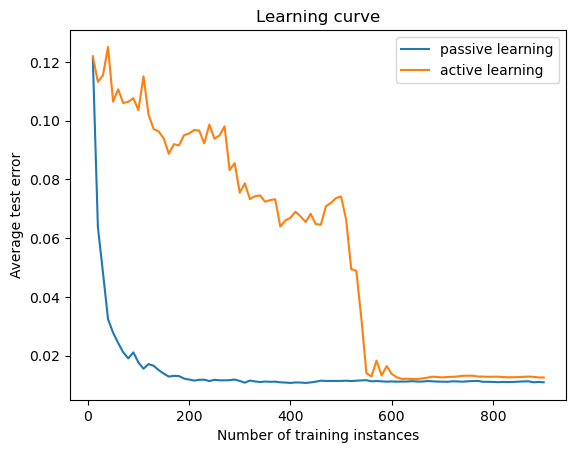

In [43]:
# Plotting both the curves simultaneously 
plt.plot(range(10,910,10), pas_avg_df, label='passive learning') 
plt.plot(range(10,910,10), act_avg_df, label='active learning') 
  
# Naming the x-axis, y-axis and the whole graph 
plt.xlabel("Number of training instances") 
plt.ylabel("Average test error") 
plt.title("Learning curve") 
  
# Adding legend, which helps us recognize the curve according to it's color 
plt.legend() 
  
# To load the display window 
plt.show() 